In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
import wordcloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stopwords = set(stopwords.words('english'))
stem = PorterStemmer()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [4]:
corpus = []  

In [5]:
# cleaning texts

for review in data['Review']:
    review = review.lower()
    review = re.sub('[^a-z]',' ',review)
    review = review.split()
    review = [stem.stem(item) for item in review if item not in stopwords]
    review = ' '.join(review)
    corpus.append(review)
    

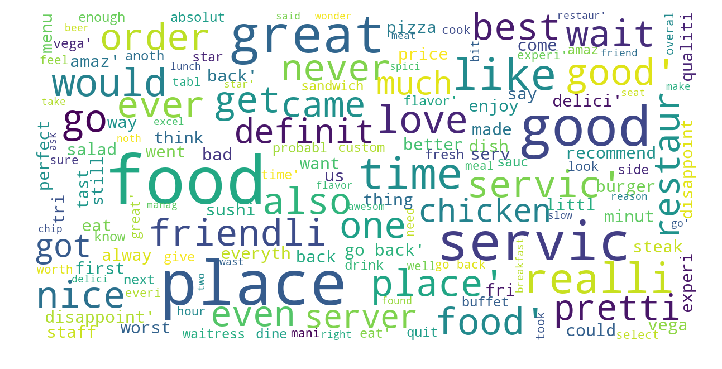

In [6]:
# wordcloud

from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=150,
        max_font_size=40, 
        scale=3
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [7]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 400)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [8]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)